In [6]:
import pandas as pd
import helper.entsoe_wrapper as entsoe_wrapper
import helper.intensity as its
import helper.capacity as cap
import helper.drought as drought
import matplotlib.pyplot as plt
import helper.weather as weather
from sklearn.linear_model import LinearRegression
import numpy as np
country='FR'
start=pd.Timestamp('2022-01-01', tz='UTC')
end=pd.Timestamp('2023-01-01', tz='UTC')

In [2]:
server_countries=["DE","AT","FR","BE","NL","SE","ES","IT","IE","PL"]

In [74]:
datacenter_loc={"DE":(50.110924,8.682127),"FR":(48.856667,2.351667),"IE":(53.35,-6.26),"IT":(45.4625,9.1864),
                "NL":(52.3702,4.8904),"PL":(52.2167,21.0333),"ES":(40.412,-3.7039),
                "SE":(59.325,18.05),"BE":(50.8466,4.3517),"AT":(48.2083,16.3731)}

In [75]:
loc=datacenter_loc["PL"]
airport = pd.read_csv("Data\\Airports\Airports.csv",sep=";",index_col=0,dtype={"Latitude":float,"Longitude":float})
dist=abs(airport['Latitude']-loc[0])+abs(airport['Longitude']-loc[1])

In [76]:
airport

,Code,City,Country,Latitude,Longitude
0,BKPR,Pristina,Montenegro,42.661588,21.161852
1,EBAW,Antwerp,Belgium,51.221110,4.399708
2,EBBE,Beauvechain,Belgium,50.780898,4.771730
3,EBBL,Kleine-Brogel,Belgium,51.172546,5.452026
4,EBBR,Brussels,Belgium,50.846557,4.351697
...,...,...,...,...,...
634,EPSC,Szczecin,Poland,53.584731,14.902961
635,EPSY,Olsztyn,Poland,53.481880,20.937703
636,EPWA,Warsaw,Poland,52.165751,20.967370
637,EPWR,Wroclaw,Poland,51.102711,16.885936


In [66]:
airport.to_csv("Data\\Airports\Airports.csv",sep=";")

In [77]:
dist.idxmin()

np.int64(631)

In [70]:
airport.iloc[624]

Code              LYVR
City             Vrsac
Country         Serbia
Latitude     45.121126
Longitude    21.296049
Name: 624, dtype: object

In [55]:
for country in datacenter_loc.keys():
    print(country)
    weather.get_closest_weather_station(datacenter_loc[country])

DE
FR
IE
IT
NL
PL


IndexError: single positional indexer is out-of-bounds

In [53]:
country="ES"
loc=datacenter_loc[country]
direct=its.load_direct_WUE(loc,start,end)
indirect=its.get_average_intensity(country,start,end,water=True,weighted=False)
direct.index=direct.index.tz_convert('UTC')
indirect.index=indirect.index.tz_convert('UTC')
direct=direct.loc[start:end] 
indirect=indirect.loc[start:end]
complete=direct+indirect

#weight=drought.load_water_weight(country,loc,start,end)

+ Downloading for LEMG


KeyboardInterrupt: 

In [52]:
weather.get_closest_weather_station(loc)

Code              LEGT
City           Madrid 
Country          Spain
Latitude     40.416705
Longitude    -3.703582
Name: 333, dtype: object

In [43]:
#help=complete*weight.iloc[:,0]

In [44]:
help.isna().sum()

np.int64(0)

In [29]:
complete.shape

(8761,)

<Axes: >

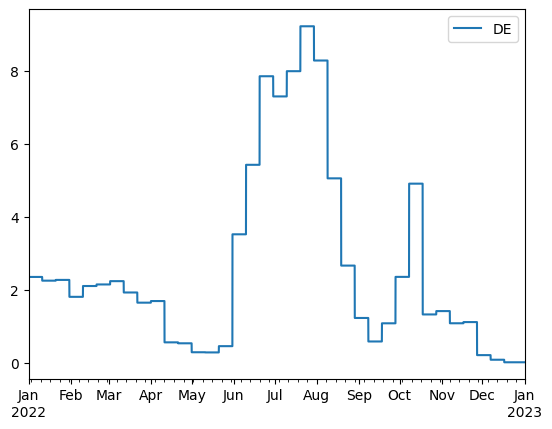

In [ ]:
drought.load_water_weight("DE",datacenter_loc["DE"],start,end)